In [8]:
# Criando o array de imagens

import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)



['/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio41.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio33.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio28.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio42.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio49.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio46.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio44.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio24.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio45.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio23.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoF

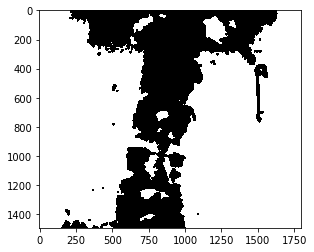

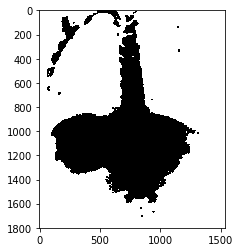

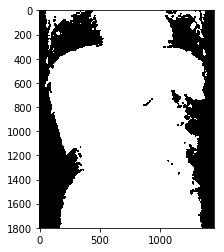

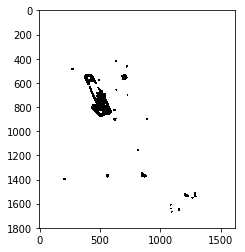

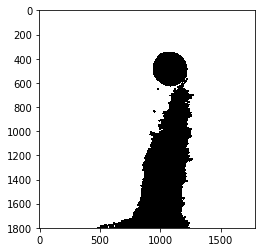

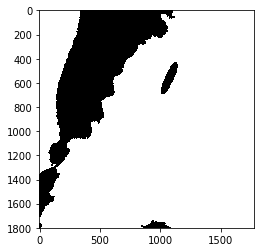

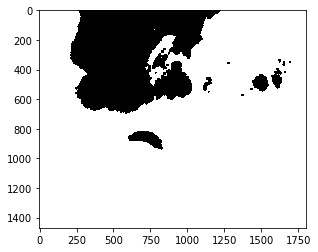

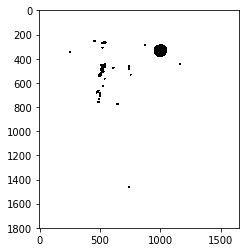

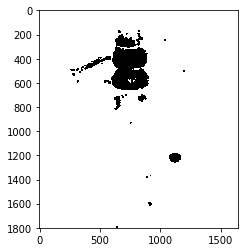

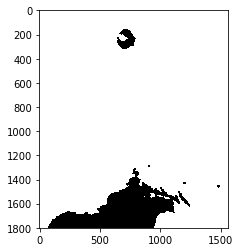

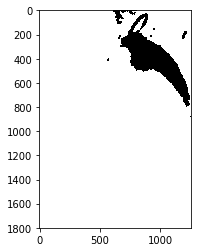

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt





def detectarCorpoEstranho(caminhoImagem,margemDeErro):
    
    #'radio'+str(i+1)+'.jpg'
    #Criando imagem
    imagemRecebida = cv2.imread(caminhoImagem)
    
    #Colocando a imagem em nível de cinza
    imagemRecebida = cv2.cvtColor(imagemRecebida, cv2.COLOR_RGB2GRAY)
    
    
    
    

    #Apresentar imagem original
    #plt.gray()
    #plt.imshow(imgTeste)
    #plt.show()
    
    
    #Coletando informações necessárias para imagem
    quantidadeLinhas, quantidadeColunas = imagemRecebida.shape

    
    
    #Diminuindo níveis de pixels da imagem de 0 a 255 para 0 a 10
    for i in range(quantidadeLinhas):
        for j in range(quantidadeColunas):
            imagemRecebida[i][j] = imagemRecebida[i][j] / 25    


            
    #Dilatando as estruturas da imagem buscando deixar corpos estranhos menores mais evidentes
    elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    imagemRecebida = cv2.dilate(imagemRecebida, elementoEstruturante, iterations = 5)


    
    #Como as imagens da base possuem um padrão em que geralmente os corpos estranhos estão
    #com pixels mais pertos do branco é necessário descobrir qual é o valor de pixel mais alto
    maiorValorPixel = max([valor for quantidadeLinhas in imagemRecebida for valor in quantidadeLinhas])
    
    
    #Tendo o valor de pixel mais alto encontrado adiciona-se uma margem de erro a este pixel, define-se
    #um intervalo e se busca todos os pixels encontrados neste intervalo
    _, imgProcessada = cv2.threshold(imagemRecebida, maiorValorPixel-margemDeErro, maiorValorPixel, cv2.THRESH_BINARY_INV)
    
   
    return imgProcessada

for i in range(52):


    ## NOME DA IMAGEM
    img = detectarCorpoEstranho(('radio'+str(i+1)+'.jpg'),2)
    
    plt.imshow(img)
    plt.show()



In [ ]:
# FAZER UMA FUNÇÃO QUE ESCUREÇA GRANDES ÁREAS -- talvez com análise de um grupo de vizinhos?
# FAZER UMA FUNÇÃO QUE EVIDENCIE O CORPO ESTRANHO -- a mesma análise de visinhos
# outro esquema seria notar a mudança abrupta de nível de cinza!